In [1]:
import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd
from natsort import natsorted

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress
from scipy.signal import find_peaks

from misc_process import normalize_max
from misc_process import get_maxima_LSPR

%matplotlib inline

In [2]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH_DARK = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','27_06_2023_auss_DNA_40to15_hyst_dark_1mL','')
DATA_UV_DIR_PATH_LIGHT = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','26_06_2023_5to40_hyst_35A','')

DATA_QPOD_DARK = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','27_06_2023_auss_DNA_40to15_hyst_dark_1mL','qpod','')
DATA_QPOD_LIGHT = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','26_06_2023_5to40_hyst_35A','qpod','')


# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_CSV = os.path.join(BASE_DIR_PATH, 'results', 'csv', '')


In [3]:
#================ import data LIGHT =========================#

# Define the path to the folder containing the CSV files
folder_path_light = DATA_UV_DIR_PATH_LIGHT

# Get a list of all CSV files in the folder
txt_files = natsorted(glob.glob(os.path.join(folder_path_light,'*.txt')))

print(len(txt_files))



#================ plot data LIGHT cycle ===========================#

# fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# Initialize the maximum value and its corresponding index
max_values = []
max_indexes = []
wv_abs = []

time = 0

for i, txt_file in enumerate(txt_files):
    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df = df.iloc[324:876, ] # from 350 till 600 nm
    
    # Find the maximum value and its corresponding index
    max_value = new_df[1].max()
    max_values.append(max_value)
    
    # Get the corresponding value from the first column
    max_index = new_df.loc[new_df[1].idxmax(), 0]
    max_indexes.append(max_index)
    
    wv_abs.append((time, max_index, max_value))
    
    time = time + 30 #data plotted in 30 second intervals
    
    # Set the color based on the index of the file
    if i == 0:
        color = 'red'
    elif i == len(txt_files) - 1:
        color = 'blue'
        linestyle = None
    else: 
        color = 'grey'
    
    # Plot the data
    # ax.plot(new_df[0],new_df[1], color = color)                           # plot data

#ax.set_xlim([400,1100])                    # set wavelength limit
# ax.set_ylim([0,0.9])                       # set absorbance limit
# ax.set_xlabel(r'Wavelength (nm)')          # set axis label
# ax.set_ylabel(r'Extinction ')              # set axis label
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.tight_layout()  

# print('(time, max. wavelength, max. abs)', wv_abs)

df_light = pd.DataFrame(wv_abs, columns=['time(s)','max.wav','abs'])
#df_agg.to_csv(RESULT_DIR_PATH_CSV + 'aggregation.csv', index = False)


df_qpod_light = pd.read_csv(DATA_QPOD_LIGHT + '40to5.txt', header = None, delimiter='\t') # col 0 - time in minutes, and col 1 - temperature
df_qpod_light

141


,0,1
0,0.000,40.00
1,0.502,40.00
2,1.000,40.01
3,1.500,40.01
4,2.000,40.00
...,...,...
136,68.001,39.59
137,68.501,40.10
138,69.001,40.01
139,69.501,40.00


In [4]:
#================ import data DARK =========================#

# Define the path to the folder containing the CSV files
folder_path = DATA_UV_DIR_PATH_DARK

# Get a list of all CSV files in the folder
txt_files = natsorted(glob.glob(os.path.join(folder_path,'*.txt')))

print(len(txt_files))

#================ plot data DARK cycle ===========================#

# fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# Initialize the maximum value and its corresponding index
max_values = []
max_indexes = []
wv_abs = []

time = 0

for i, txt_file in enumerate(txt_files):
    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df = df.iloc[324:876, ] # from 350 till 600 nm
    
    # Find the maximum value and its corresponding index
    max_value = new_df[1].max()
    max_values.append(max_value)
    
    # Get the corresponding value from the first column
    max_index = new_df.loc[new_df[1].idxmax(), 0]
    max_indexes.append(max_index)
    
    wv_abs.append((time, max_index, max_value))
    
    time = time + 30 #data plotted in 30 second intervals
    
    # Set the color based on the index of the file
    if i == 0:
        color = 'red'
    elif i == len(txt_files) - 1:
        color = 'blue'
        linestyle = None
    else: 
        color = 'grey'
    
    # Plot the data
#     ax.plot(new_df[0],new_df[1], color = color)                           # plot data

# #ax.set_xlim([400,1100])                    # set wavelength limit
# ax.set_ylim([0,0.9])                       # set absorbance limit
# ax.set_xlabel(r'Wavelength (nm)')          # set axis label
# ax.set_ylabel(r'Extinction ')              # set axis label
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.tight_layout()  

# print('(time, max. wavelength, max. abs)', wv_abs)

df_dark = pd.DataFrame(wv_abs, columns=['time(s)','max.wav','abs'])
#df_agg.to_csv(RESULT_DIR_PATH_CSV + 'aggregation.csv', index = False)

df_qpod_dark = pd.read_csv(DATA_QPOD_DARK + '40to15hyst_dark.txt', header = None, delimiter='\t') # col 0 - time in minutes, and col 1 - temperature
df_qpod_dark

121


,0,1
0,0.000,40.00
1,0.500,40.00
2,1.000,40.00
3,1.500,40.00
4,2.000,39.88
...,...,...
105,52.501,40.09
106,53.001,39.98
107,53.501,39.99
108,54.001,40.00


In [5]:
df_dark[:110]

,time(s),max.wav,abs
0,0,526,0.741
1,30,525,0.740
2,60,525,0.740
3,90,526,0.741
4,120,527,0.740
...,...,...,...
105,3150,526,0.723
106,3180,525,0.723
107,3210,525,0.722
108,3240,526,0.722


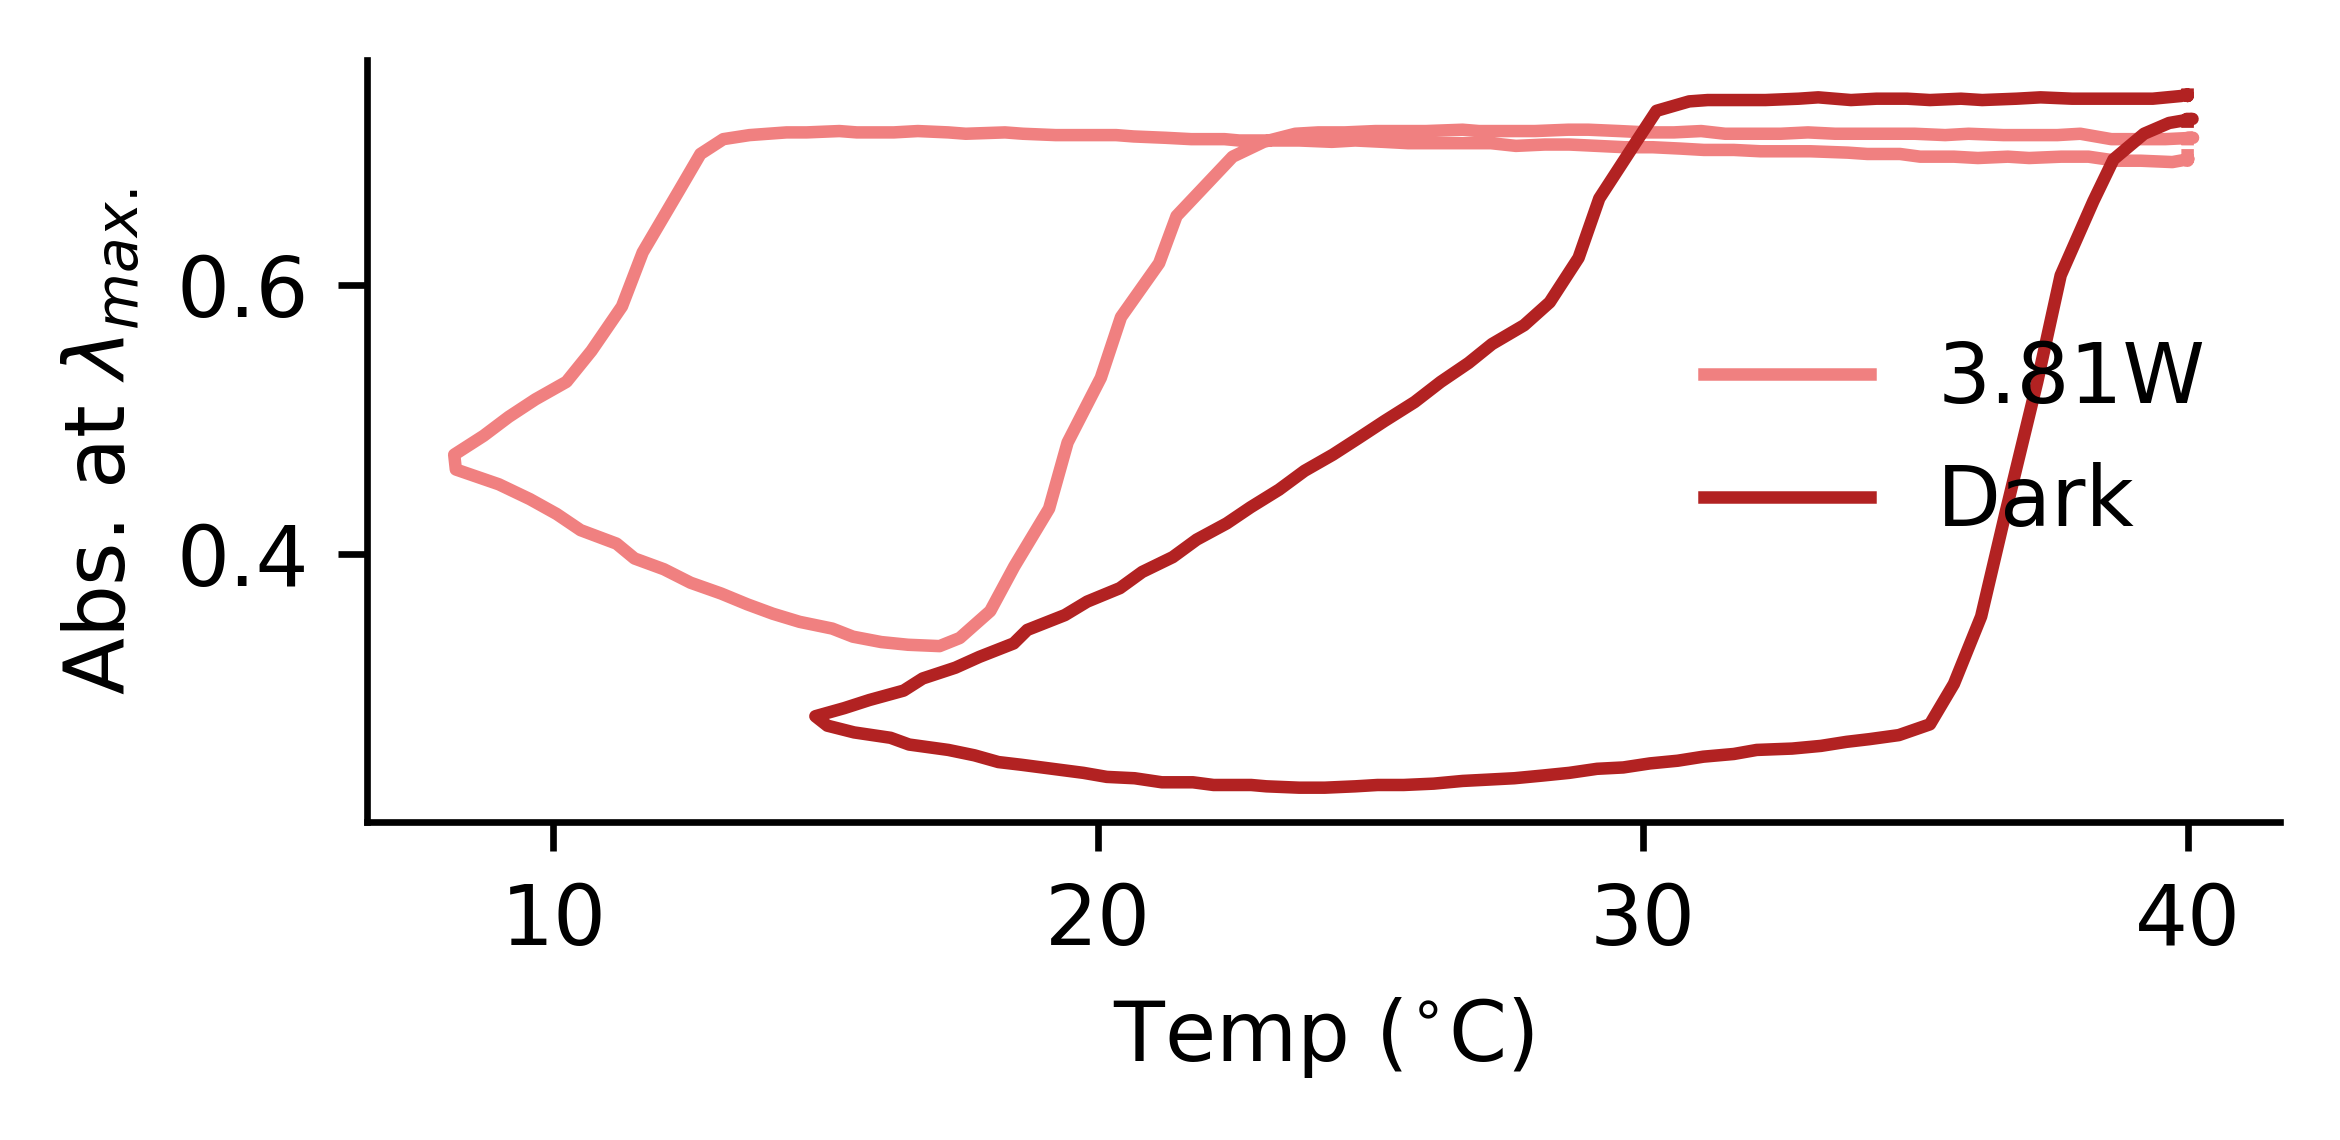

In [6]:

fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one


ax.plot(df_qpod_light[1], df_light['abs'], label = '3.81W', color = 'lightcoral')                           # plot data

ax.plot(df_qpod_dark[1], df_dark['abs'][:110], label = 'Dark', color = 'firebrick')                           # plot data

#ax.set_xlim([5,50])                   
#ax.set_ylim([520,600])                       
ax.set_xlabel(r'Temp ($^{\circ}$C)')          # set axis label
ax.set_ylabel(r'Abs. at $\lambda_{max.}$')              # set axis label
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  

plt.savefig(RESULT_DIR_PATH + 'Fig_S8.pdf', transparent = True, bbox_inches = 'tight')